<a href="https://colab.research.google.com/github/younhuiji/python/blob/main/ml02_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
#> sklearn(scikit-learn) 패키지의 neighbors 모듈(파일)에서 KneighborsClassifier 클래스 이름을 import.
from sklearn.model_selection import train_test_split
#> sklearn.model_selection 모듈에서 train_test_split 함수 이름을 import.
from sklearn.metrics import confusion_matrix, classification_report
#> sklearn.metrics 모듈에서 confusion_matrix, classfication_report 함수 이름들을 import.
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#> sklearn.preprocessing 모듈에서 StandardScaler, MinMaxScaler 클래스 이름들을 import.

# import 모듈이름
# from 모듈이름 import 클래스이름/함수이름

# 데이터 준비

수산 시장(fish market) 데이터 셋. 물고기 종류(어종)와 여러가지 특성들(무게, 길이, ...) 이 정리된 csv 파일.

In [ ]:
fish_file = 'https://github.com/JakeOh/202208_itw_java134_lab_python/raw/main/fish.csv'

In [ ]:
fish_df = pd.read_csv(fish_file)

In [ ]:
fish_df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
fish_df.tail()

,Species,Weight,Length,Diagonal,Height,Width
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,15.0,16.2,2.9322,1.8792


#  데이터 탐색(EDA : Exploratory Data Analysis)

In [ ]:
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [ ]:
fish_df.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
# 카테고리 변수 빈도수
fish_df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

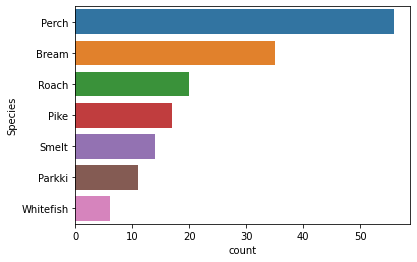

In [ ]:
sns.countplot(data=fish_df, y='Species', order=fish_df.Species.value_counts().index)
plt.show()

In [ ]:
fish_df.describe() # 숫자 타입 변수들의 기술 통계량

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


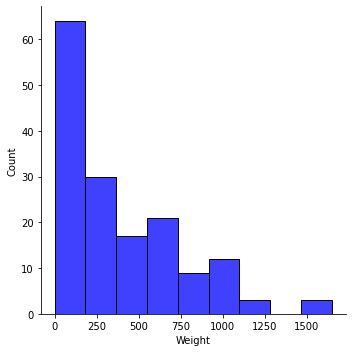

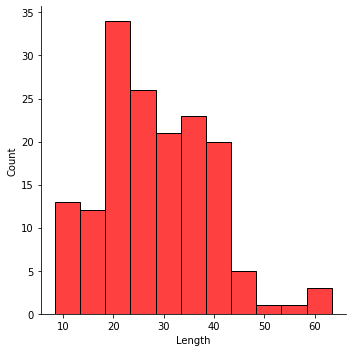

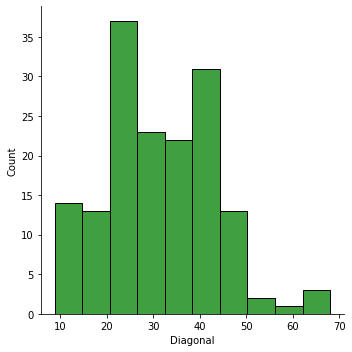

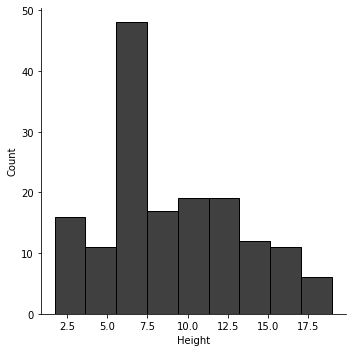

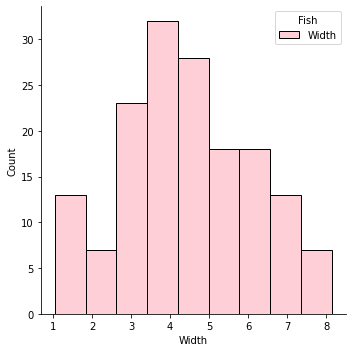

In [ ]:
sns.displot(fish_df.Weight, color='blue', label='weight', ax=ax[0])
sns.displot(fish_df.Length, color='red', label='Length')
sns.displot(fish_df.Diagonal, color='green', label='Diagonal')
sns.displot(fish_df.Height, color='black', label='Height')
sns.displot(fish_df.Width, color='pink', label='Width')

plt.legend(title='Fish')
plt.show()

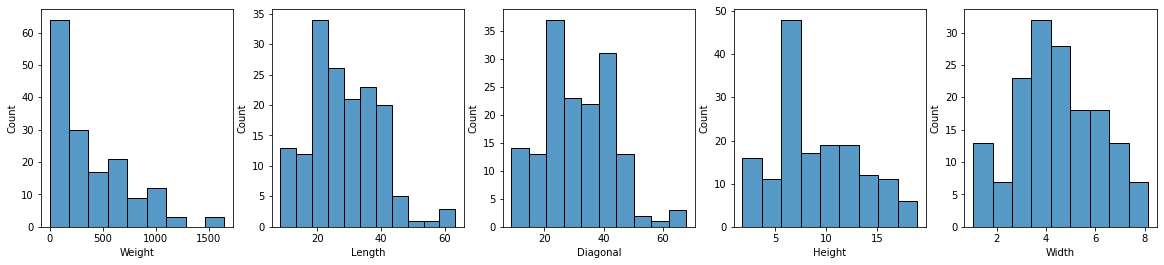

In [ ]:
# 1 x 5 subplot에 숫자타입 변수 5개의 히스토그램.
fig, ax = plt.subplots(ncols=5, figsize=(20, 4))

variables = fish_df.columns[1:]
for i, x in enumerate(variables):
    sns.histplot(data=fish_df, x=x, ax=ax[i])
plt.show()

변수들 간의 상관관계 - 산점도(scatter plot)

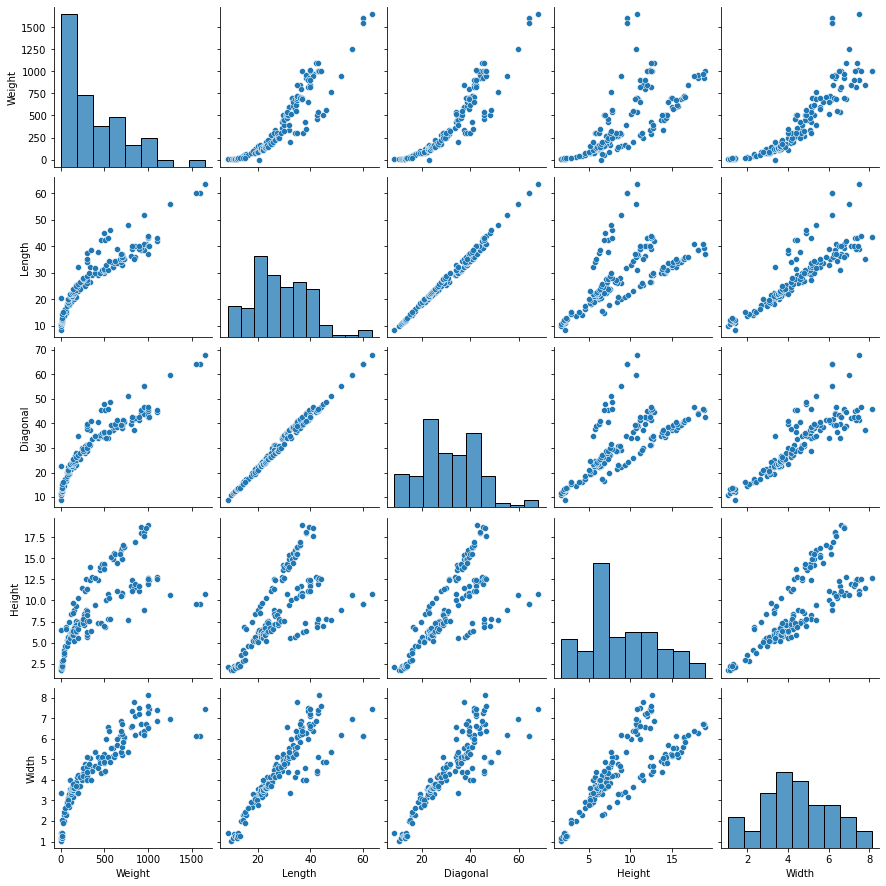

In [ ]:
sns.pairplot(data=fish_df)
plt.show()

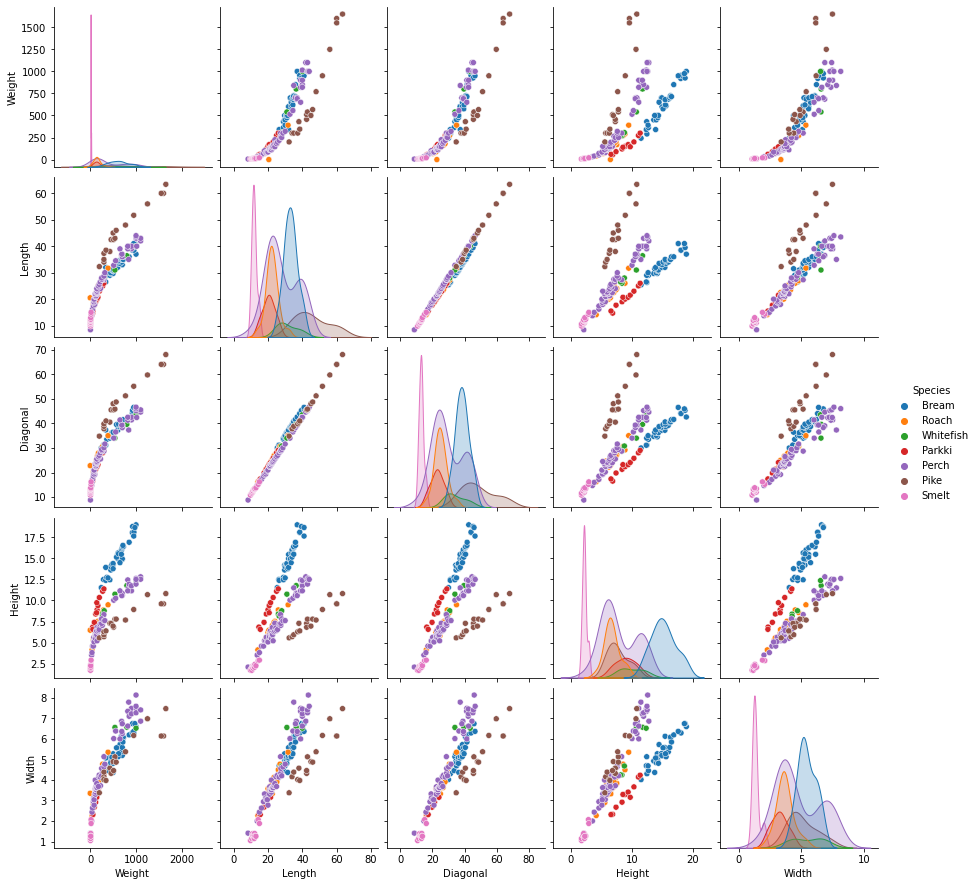

In [ ]:
sns.pairplot(data=fish_df, hue='Species') # 어종에 따라서 색깔을 다르게 표현
plt.show()

# 문제 정의 

* 이진 분류(binary classfication) - Bream(도미), Smelt(빙어) 분류 문제.
* 독립 변수 선택 - Weight(무게), Length(길이) 특성만 고려.

In [ ]:
pd.options.display.max_rows = 10
# pandas 의 Series 또는 DataFrame을 출력할 때 최대 행의 개수

In [ ]:
df= fish_df.loc[((fish_df.Species == 'Bream')|(fish_df.Species == 'Smelt')), ['Species', 'Weight', 'Length']]

In [ ]:
df

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [ ]:
df.Species.value_counts()

Bream    35
Smelt    14
Name: Species, dtype: int64

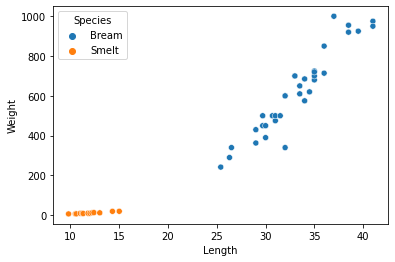

In [ ]:
# Weight ~ Length 산점도. Species 에 따라서 정의 색갈을 다르게 표현.
sns.scatterplot(data=df, x='Length', y='Weight', hue='Species')
plt.show()

* scikit-learn 패키지의 머신 러닝 알고리즘들은 데이터(특성)
과 레이블(타겟)을 구분해서 사용.
* 특성 배열은 2차원 ndarray, 타겟 배열은 1차원 ndarray.


In [ ]:
# 데이터프레임을 특성 배열(2d-narray)과 타겟 배열(1d-array)로 나눔.
X = df[['Weight', 'Length']].values #  특성배열 - shape(n_samples, n_features)
y = df['Species'].values # 타켓배열 - shape(n_shape, )

In [ ]:
print(X[:5])
print(X.shape)

[[242.   25.4]
 [290.   26.3]
 [340.   26.5]
 [363.   29. ]
 [430.   29. ]]
(49, 2)


In [ ]:
print(y[:5])
print(y.shape)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']
(49,)


KNN(K-Nearest Neighbors, K-최근접 이웃) Classfier(분류기)

KNN

* k개의 가장 가까운 이웃들의 레이블을 사용해서 예측(분류)하는 머신 러닝 모델.
* KNN 모델(알고리즘)은 별도의 훈련(학습) 시간이 필요하지 않음
* KNN은 예측을 할 때 훈련(학습) 데이터와 테스트 데이터 사이의 거리를 계산한 후 가장 가까운 거리 k개를 찾음.
    * 예측 시간이 오래 걸릴 수 있음.
    * 이런 이유때문에 KNN은 "게으른 알고리즘(lazy algorithm)"이라고 함.

## 머신 러닝 모델 객체 생성


In [ ]:
# ML 모델(알고리즘) 객체 생성.
knn_clf = KNeighborsClassifier()
#> n_neighbors=5: KNN에서 사용할 k값. 가장 가까운 이웃들의 개수.
#> metric = 'minkowski': 거리 계산 공식.

## 머신 러닝 모델 훈련(학습)

In [ ]:
knn_clf.fit(X, y)

KNeighborsClassifier()

## 훈련 셋에서의 학습 결과 평가

In [ ]:
# 훈련 셋에서 예측값 찾기
y_pred = knn_clf.predict(X)
print(y_pred)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt'
 'Smelt' 'Smelt' 'Smelt' 'Smelt' 'Smelt' 'Smelt' 'Smelt' 'Smelt' 'Smelt'
 'Smelt' 'Smelt' 'Smelt' 'Smelt']


In [ ]:
# 실젯값과 예측값을 비교
np.mean(y ==y_pred) #  정확도(accuracy)

1.0

# 가상의 물고기 테스트 데이터의 예측값

(600g, 30cm), (50g, 14cm) 물고기

In [ ]:
X_test = np.array([[600, 30], 
                   [50, 14]])
print(X_test)

[[600  30]
 [ 50  14]]


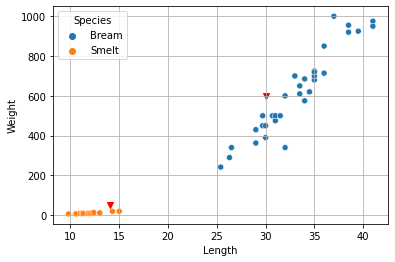

In [ ]:
# 훈련 데이터 시각화
sns.scatterplot(data=df, x='Length', y='Weight', hue='Species')
# 가상의 테스트 셋 시각화
plt.scatter(x=X_test[:, 1], y=X_test[:, 0], color='red', marker='v')

plt.grid()
plt.show()
     

In [ ]:
test_pred = knn_clf.predict(X_test)
print(test_pred)

['Bream' 'Smelt']


가상의 테스트 물고기들의 가장 가까운 이웃 찾기

In [ ]:
neighbor_indices = knn_clf.kneighbors(X_test, return_distance=False)
neighbor_indices # 가장 가까운 k=5개의 이웃들의 인덱스.

array([[15, 14, 18, 22, 20],
       [48, 47, 45, 46, 44]])

In [ ]:
distance, indices =  knn_clf.kneighbors(X_test, return_distance=True)
# 이웃들과의 거리들의 배열, 이웃들의 인덱스 배열

In [ ]:
print(distance)

[[ 2.          2.         10.59481005 20.5        25.3179778 ]
 [30.11660671 30.30148511 36.63495598 37.8132252  37.84283287]]


In [ ]:
print(indices)

[[15 14 18 22 20]
 [48 47 45 46 44]]


##  k값 (가장 가까운 이웃의 개수)에 따른 정확도의 변화.

* k값을 1 ~ 49 까지 변화시키면서 KNN 모델을 생성.
* 생성된 KNN 모델을 훈련. 예측값 찾기. 정확도를 계산.
* k 값에 따른 정확도 그래프(정확도 ~ k 값)

In [ ]:
k_values = np.arange(1, 50) # [1, 2, 3, ..., 48, 49]
accuracies = [] # 각 k값에서 계산한 정확도를 저장할 리스트

In [ ]:
from itertools import accumulate
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k) # ML 모델 생성
    knn.fit(X, y) # ML 모델 훈련
    # pred = knn.predict(X) # 훈련 데이터의 예측값
    # acc = np.mean(y == pred) # 정확도 계산
    acc = knn.score(X, y) #  정확도 
    accuracies.append(acc) # 계산된 정확도를 리스트에 추가

print(accuracies)
    

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9795918367346939, 1.0, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143]


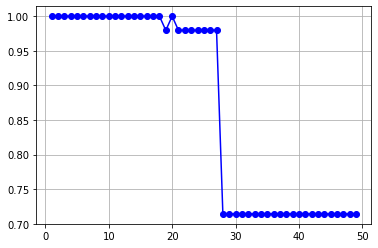

In [ ]:
plt.plot(k_values, accuracies, 'bo-')
plt.grid()
plt.show()

# 훈련 셋/ 테스트 셋 분리

훈련 셋과 테스트 셋을 나누는 방법:

* 순차적 추출 (sequential sampling)
* 임의 추출 (random sampling)
* 층화 추출 (stratified sampling)

In [ ]:
# 전체 데이터 셋 X(특성), y(레이블)을 훈련 셋/테스트 셋으로 분리.
X_tr, X_te, y_tr, y_te = train_test_split(X, y,
                                          test_size=0.3,
                                          random_state=1,
                                          shuffle=True,
                                          stratify=y)

`train_test_split()` 함수의 파라미터:

* X, y: 훈련 셋/테스트 셋으로 나눌 배열(들).
* test_size: 테스트 셋의 원소 개수 또는 비율.
    * test_size의 값이 정수이면, 테스트 샘플 개수.
    * test_size의 값이 0 ~ 1 사이의 실수이면, 테스트 샘플의 비율.
* train_size: 훈련 셋의 샘플 개수 또는 비율. test_size 값이 있으면 자동으로 계산됨.
* random_state: 난수를 생성하는 seed(np.random.seed(숫자)). 임의 추출 또는 층화 추출에서 샘플들을 섞기 위한 난수를 만들 때 사용.
* shuffle: 샘플을 랜덤하게 섞을 지를 설정.
    * True(기본값): 샘플들을 랜덤하게 섞음. 임의 추출.
    * False: 샘플들을 섞지 않음. 순차적 추출.
* stratify: 층화 추출의 기준이 되는 (각 클래스(카테고리)의 비율을 알 수 있는) 1차원 배열. 타켓 배열(레이블).

In [ ]:
# 훈련 셋: 테스트 셋 = 7:3
print(X_tr.shape, X_te.shape) # 훈련/테스트 데이터의 모양
print(y_tr.shape, y_te.shape) # 훈련/테스트 레이블의 모양

(34, 2) (15, 2)
(34,) (15,)


In [ ]:
49 * 0.3

14.7

In [ ]:
tr_species, tr_counts = np.unique(y_tr, return_counts=True)
print(tr_species)
print(tr_counts)

['Bream' 'Smelt']
[24 10]


In [ ]:
tr_counts / 34

array([0.70588235, 0.29411765])

In [ ]:
te_species, te_counts = np.unique(y_te, return_counts=True)
print(te_species)
print(te_counts)

['Bream' 'Smelt']
[11  4]


In [ ]:
te_counts / 15

array([0.73333333, 0.26666667])

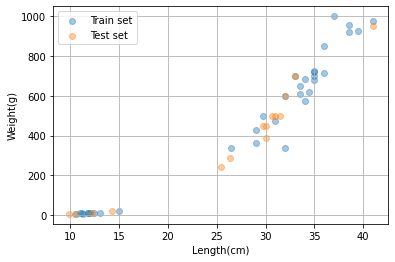

In [ ]:
# 훈련 셋과 테스트 셋 시각화: Weight ~ Length. 훈련/테스트에 따라서 색깔을 다르게.
plt.scatter(X_tr[:,1], X_tr[:, 0], label='Train set', alpha=0.4)
plt.scatter(X_te[:, 1], X_te[:,0], label='Test set', alpha=0.4)
plt.legend()
plt.grid()
plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.show()

## 층화 추출 (훈련) 샘플로 KNN 모델을 훈련

In [ ]:
knn_clf = KNeighborsClassifier() # k = 5

In [ ]:
knn_clf.fit(X_tr, y_tr) # 훈련 데이터와 훈련 레이블로 모델을 훈련

KNeighborsClassifier()

## 모델 평가

In [ ]:
# 훈련 셋의 정확도
knn_clf.score(X_tr, y_tr)

1.0

In [ ]:
# 테스트 셋의 정확도
knn_clf.score(X_te, y_te)

1.0

# 분류 평가 지표

In [ ]:
y_te_pred = knn_clf.predict(X_te)
print(y_te_pred)
print(y_te)

['Smelt' 'Smelt' 'Smelt' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream']
['Smelt' 'Smelt' 'Smelt' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [ ]:
confusion_matrix(y_te, y_te_pred) # 오차행렬(혼동행렬, 혼돈행렬)

array([[11,  0],
       [ 0,  4]])

In [ ]:
clf_report = classification_report(y_te, y_te_pred)
print(clf_report)

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        11
       Smelt       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



**분류 평가 지표(classfication metrics)**
 
* 용어 정리
    * TP(True Positive, 진짜 양성): 실제 양성 샘플을 양성으로 맞게 예측한 것.
    * FN(False Negative, 가짜 음성): 실제 양성 샘플을 음성으로 틀리게 예측한 것.
    * FP(False Positive, 가짜 양성): 실제 음성 샘플을 양성으로 틀리게 예측한 것.
    * TN(True Negative, 진짜 음성): 실제 음성 샘플을 음성으로 맞게 예측한 것.

* **정확도(accuracy)**: 샘플들을 정확하게 분류한 비율. 전체 샘플 중에서 정답의 비율.
> accuracy = (TP + TN) / (TP + TN + FP + FN)
* **정밀도(precision)**:  양성 예측들 중에서 정답의 비율.
> precision = (TP) / (TP + FP)
* **재현율(recall)**: 실제 양성 샘플들 중에서 정답의 비율. 
> recall = (TP) / (TP + FN)

* **F1-score**: 정밀도와 재현율의 조화 평균(역수들의 평균의 역수).
> 2 * precision * recall / (precision + recall)

# 특성 스케일링(feature scaling)

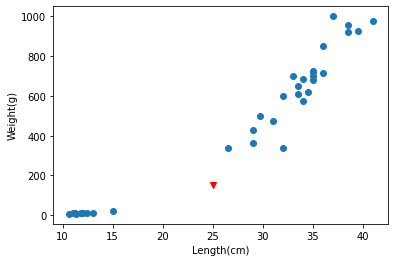

In [ ]:
# 훈련 셋(X_tr) 시각화 (Weight ~ Length)
plt.scatter(X_tr[:, 1], X_tr[:, 0])

# 가상의 물고기 데이터: 150g, 25cm
unknown = np.array([[150, 25]]) # shape (1,2)을 갖는 2d-array.
plt.scatter(25, 150, marker='v', color='red')

plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.show()

In [ ]:
# 가상의 물고기 unknown의 예측값
knn_clf.predict(unknown)

array(['Smelt'], dtype=object)

In [ ]:
distances, indices = knn_clf.kneighbors(unknown)

In [ ]:
print(distances) # (1, 5)
print(indices) # (1, 5)

[[130.48375378 137.17988191 138.32150953 140.62090883 140.72046759]]
[[ 7  5 15 26  2]]


In [ ]:
y_tr[indices[0]]

array(['Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'], dtype=object)

In [ ]:
X_tr[indices[0]]

array([[19.9, 15. ],
       [13.4, 12.4],
       [12.2, 13. ],
       [10. , 11.8],
       [ 9.9, 11.8]])

2개의 특성(무게, 길이)의 스케일이 너무 다르기 때문에, 거리 계산 공식에서 무게가 더 큰 영향을 미치고 있음. 물고기 종류를 예측할 때 길이 특성은 거의 무시되고 있음.

2개의 특성을 비슷한 스케일로 변환을 한 후 ML 모델을 훈련을 시켜야 함. 특성 스케일링의 종류에는 표준화, 정규화가 있음.

* 표준화(standardization): 훈련 셋의 평균이 0, 표준편차가 1이 되도록 스케일링하는 방법.
* 정규화(normalization): min-max scaling. 훈련 셋의 최솟값이 0, 최댓값이 1이 되도록 스케일링하는 방법.

In [ ]:
# 스케일링 하기 전의 훈련 셋
print(X_tr[:5])

[[  8.7  11.3]
 [500.   29.7]
 [  9.9  11.8]
 [850.   36. ]
 [  7.   10.6]]


In [ ]:
std_scaler = StandardScaler() # 표준화 스케일러 객체 생성.

In [ ]:
std_scaler.fit(X_tr) # 훈련 셋의 평균과 표준편차를 찾는 과정.

StandardScaler()

In [ ]:
print(std_scaler.mean_) # 훈련 셋의 특성들의 평균
print(std_scaler.var_) # 훈련 셋의 특성들의 분산

[475.36470588  27.59705882]
[1.16589375e+05 1.10007344e+02]


In [ ]:
print(np.mean(X_tr, axis=0))
print(np.var(X_tr, axis=0))

[475.36470588  27.59705882]
[1.16589375e+05 1.10007344e+02]


In [ ]:
X_tr_scaled = std_scaler.transform(X_tr) # 훈련 셋을 표준화 스케일링 수행.

In [ ]:
print(X_tr_scaled[:5])

[[-1.36670716 -1.55381172]
 [ 0.07214866  0.20050088]
 [-1.36319275 -1.50614018]
 [ 1.09718333  0.80116226]
 [-1.3716859  -1.62055187]]


스케일러 객체 생성 --> 스케일러 객체를 훈련 셋에 fit --> 훈련 셋을 스케일링.

* `StandardScaler()` --> `scaler.fix(X)` --> `scaler.transform(X)`

* `StandardScaler()` --> `sclaer.fit_transform(X)`

* 훈련 셋: fit() 메섣를 호출한 후 `transform()` 메서드를 호출하거나, `fit_transform()` 메서드를 호출.

* 테스트 셋: 훈련 셋의 분포를 사용해서 스케일을 변환하기 때문에, `transform()` 메서드만 호출.

In [ ]:
# 가상의 물고기 데이터 unknown의 스케일을 변환.
unknown_scaled = std_scaler.transform(unknown)

In [ ]:
print(unknown_scaled)

[[-0.95288602 -0.24761158]]


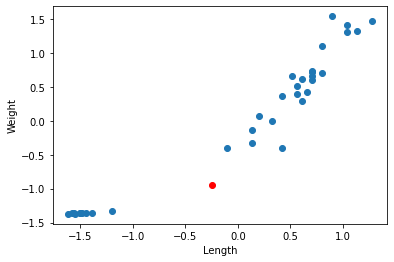

In [ ]:
# 스케일이 변환된 훈련 셋 시각화
plt.scatter(X_tr_scaled[:, 1], X_tr_scaled[:, 0])

# 가상의 물고기 데이터: 150g, 25cm
plt.scatter(unknown_scaled[0, 1],unknown_scaled[0,0] , color='red')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

KNN 모델을 생성하고, 스케일이 변환된 훈련 셋에서 훈련시킨 후에 가상의 물고기 데이터의 예측값을 찾음.

In [ ]:
knn_clf = KNeighborsClassifier() # ML 모델 생성.

In [ ]:
knn_clf.fit(X_tr_scaled, y_tr) # ML 모델을 스케일링된 훈련 셋으로 훈련.

KNeighborsClassifier()

In [ ]:
knn_clf.predict(unknown_scaled) # 가상의 물고기의 스케일링된 데이터(특성)로 예측

array(['Bream'], dtype=object)

In [ ]:
distances, indices = knn_clf.kneighbors(unknown_scaled)
print(distances)
print(indices)

[[0.57453188 0.73114963 0.86894103 0.90437289 1.02674558]]
[[20 13 11 23  7]]


In [ ]:
y_tr[indices[0]]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Smelt'], dtype=object)

In [ ]:
# 훈련 셋에서의 정확도
knn_clf.score(X_tr_scaled, y_tr)

1.0

In [ ]:
# 테스트 셋을 스케일 변환
X_te_scaled = std_scaler.transform(X_te)

# 테스트 셋에서의 정확도
knn_clf.score(X_te_scaled, y_te)

1.0

## Min-Max Scaler

In [ ]:
# X_tr: (스케일 변환 전)훈련 데이터, y_tr: 훈련 레이블
# X_te: (스케일 변환 전)테스트 데이터, y_tr: 테스트 레이블
scaler = MinMaxScaler() # Scaler 객체 생성

# 훈련 셋에서 최솟값, 최댓값을 찾아서 훈련 셋의 스케일을 변환.
X_tr_scaled = scaler.fit_transform(X_tr) 
# 훈련 셋에서 찾은 최솟값과 최댓값을 사용해서, 테스트 셋의 스케일을 변환.
X_te_scaled = scaler.transform(X_te)


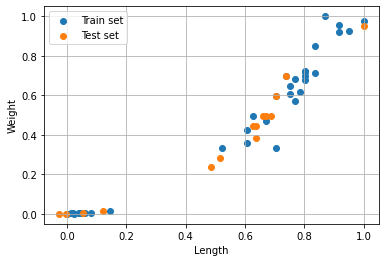

In [ ]:
# 스케일 변환된 훈련 셋 산점도
plt.scatter(X_tr_scaled[:, 1], X_tr_scaled[:, 0], label='Train set')
# 스케일 변환된 테스트 셋 산점도
plt.scatter(X_te_scaled[:,1], X_te_scaled[:,0], label='Test set')

plt.grid()
plt.legend()
plt.xlabel('Length')
plt.ylabel('Weight')

plt.show()

In [ ]:
knn_clf = KNeighborsClassifier() # ML 모델 생성
knn_clf.fit(X_tr_scaled, y_tr) # 훈련 셋으로 모델을 훈련

KNeighborsClassifier()

In [ ]:
knn_clf.score(X_tr_scaled, y_tr) # 훈련 셋에서의 정확도

1.0

In [ ]:
knn_clf.score(X_te_scaled, y_te) # 테스트 셋에서의 정확도

1.0